Name:  Amir Hossein Haji Mohammad Rezaie           
Student ID: 99109252

**Part 1**

 Write two functions named "camera_matrix" and "camera_projection". The first one gets all the camera parameters, containing λ, f (focal length), Sx, Sy, Sθ, Ox, Oy, R, T, and returns the camera matrix (Please provide comments above each stage of transformation). The second function projects a given 3D point on image and returns a 2D point in pixel coordinates.

In [49]:
import numpy as np

def camer_matrix(lamda, f, Sx, Sy, S_theta, Ox, Oy, R, T):
    
    # extrinsic camera parameters (translation & rotation)
    mat1 = np.concatenate((R, T), axis=1)
    mat1 = np.concatenate((mat1, np.array([[0, 0, 0, 1]])), axis=0)
    
    # projection matrix
    mat2 = np.concatenate((np.identity(3), np.zeros((3, 1))), axis=1)
    
    # calibration matrix (intrinsic camera parameters (f, scale, skew, pixel coordiante origins))
    mat3 = np.array([f*Sx, f*S_theta, Ox, 0, f*Sy, Oy, 0, 0, 1]).reshape(3, 3)
    
    # compute final camera projection matrix
    matrix = lamda * (mat3 @ mat2 @mat1)

    return matrix

def camera_projection(X, Y, Z, matrix):
    vector = np.array([X, Y, Z, 1]).reshape(4, 1)
    projected_vector = (matrix @ vector).reshape(-1, )
    x, y, z = projected_vector
    # homogeneous coordinate
    return x/Z, y/Z


**Part 2**

Consider a pinhole camera with center located at (1, 1, -3), which its focal length is 100, scale factors (Sx, Sy) are both 1 and pixel coordinates of principal point is (50, 50). Also skew parameter is zero. The angle of the camera is such that the optical axis of the camera is parallel to the z axis. Using the previous function obtain the whole camera matrix.

In [50]:
lamda = 1
T = np.array([[-1, -1, 3]]).reshape(3, 1)
R = np.identity(3)
f = 100
Sx = Sy = 1
S_theta = 0
Ox = Oy =50

cam_matrix = camer_matrix(lamda, f, Sx, Sy, S_theta, Ox, Oy, R, T)

cam_matrix

array([[100.,   0.,  50.,  50.],
       [  0., 100.,  50.,  50.],
       [  0.,   0.,   1.,   3.]])

**Part 3**

Suppose that vector V: (0, 1, 1) is located at (1, 1, 3) in 3D space. Apply the obtained camera matrix to V. Plot the result in pixel coordinates in a 2D plot. From which step of projection the length of the vector changes?

Answer: after producting vector with calibration matrix, the vectore length changes as a result of multiplying scale factors to vector.

In [51]:
vec = np.array([0, 1, 1])
p1 = np.array([1, 1, 3])

# sampling 100 points that are placed on the vector
x_t = []
y_t = []
for i in range(1, 101):
    X, Y, Z = p1 + (i/100)*vec
    x, y = camera_projection(X, Y, Z, cam_matrix)
    x_t.append(x)
    y_t.append(y)

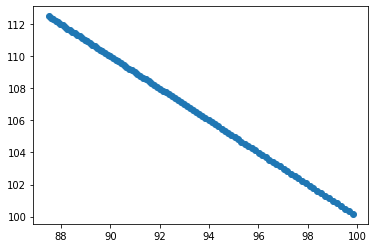

In [52]:
import matplotlib.pyplot as plt

plt.scatter(x_t, y_t)

**Part 4**

If the camera is rotated by +25 degrees around x axis, how would R and T change? What would the final image be?

In [53]:
import math as m
def Rx(theta):
    return np.array([[ 1, 0           , 0           ],
                      [ 0, m.cos(theta),-m.sin(theta)],
                      [ 0, m.sin(theta), m.cos(theta)]])

R = Rx(25 * m.pi/180)
cam_matrix = camer_matrix(lamda, f, Sx, Sy, S_theta, Ox, Oy, R, T)

In [54]:
cam_matrix

array([[100.        ,  21.13091309,  45.31538935,  50.        ],
       [  0.        , 111.76169179,   3.05356318,  50.        ],
       [  0.        ,   0.42261826,   0.90630779,   3.        ]])

In [55]:
p1 = np.array([0, 0, 1])
vec = np.array([1, 1, 3])

x_1 = []
y_1 = []
for i in range(1, 101):
    X, Y, Z = p1 + (i/100)*vec
    x, y = camera_projection(X, Y, Z, cam_matrix)
    x_1.append(x)
    y_1.append(y)
    


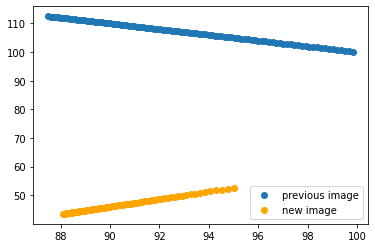

In [56]:
plt.scatter(x_t, y_t)
plt.scatter(x_1, y_1, color='orange')
plt.legend(['previous image', 'new image'])